In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"krishnavyas36","key":"2cabc2c9c42b0c4e32ab3ca3a04f5194"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mahmoudima/mma-facial-expression


Dataset URL: https://www.kaggle.com/datasets/mahmoudima/mma-facial-expression
License(s): unknown
mma-facial-expression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

with zipfile.ZipFile("mma-facial-expression.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/mma_facial_expression")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from itertools import chain
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)



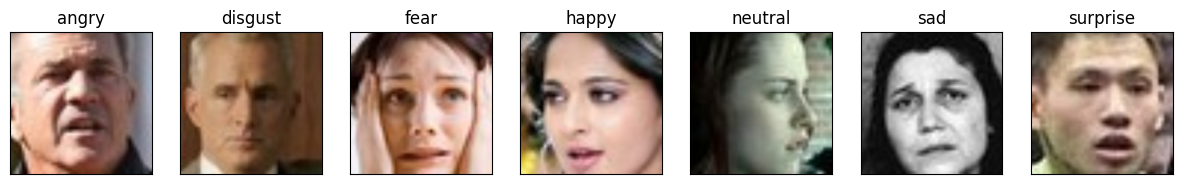

In [ ]:
import matplotlib.pyplot as plt

class_names = train_emotion.classes

fig = plt.figure(figsize=(15, 5))
num_classes = len(class_names)
for i in range(num_classes):
    ax = fig.add_subplot(1, num_classes, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img, label = next((img, label) for img, label in test_emotion if label == i)
    img = img.permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())
    plt.imshow(img)
plt.show()


In [ ]:
emotion_trans = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.4630, 0.4530, 0.3405], std = [0.2862, 0.2758, 0.2845])
])

In [ ]:
train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)


In [ ]:
from collections import Counter

train_class_counts = Counter([label for _, label in train_emotion.samples])
print("Number of images in each class (Train):")
for class_idx, count in train_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

test_class_counts = Counter([label for _, label in test_emotion.samples])
print("\nNumber of images in each class (Test):")
for class_idx, count in test_class_counts.items():
    print(f"{class_names[class_idx]}: {count}")

Number of images in each class (Train):
angry: 6566
disgust: 3231
fear: 4859
happy: 28592
neutral: 29384
sad: 12223
surprise: 8113

Number of images in each class (Test):
angry: 1041
disgust: 655
fear: 691
happy: 5459
neutral: 5858
sad: 2177
surprise: 1475


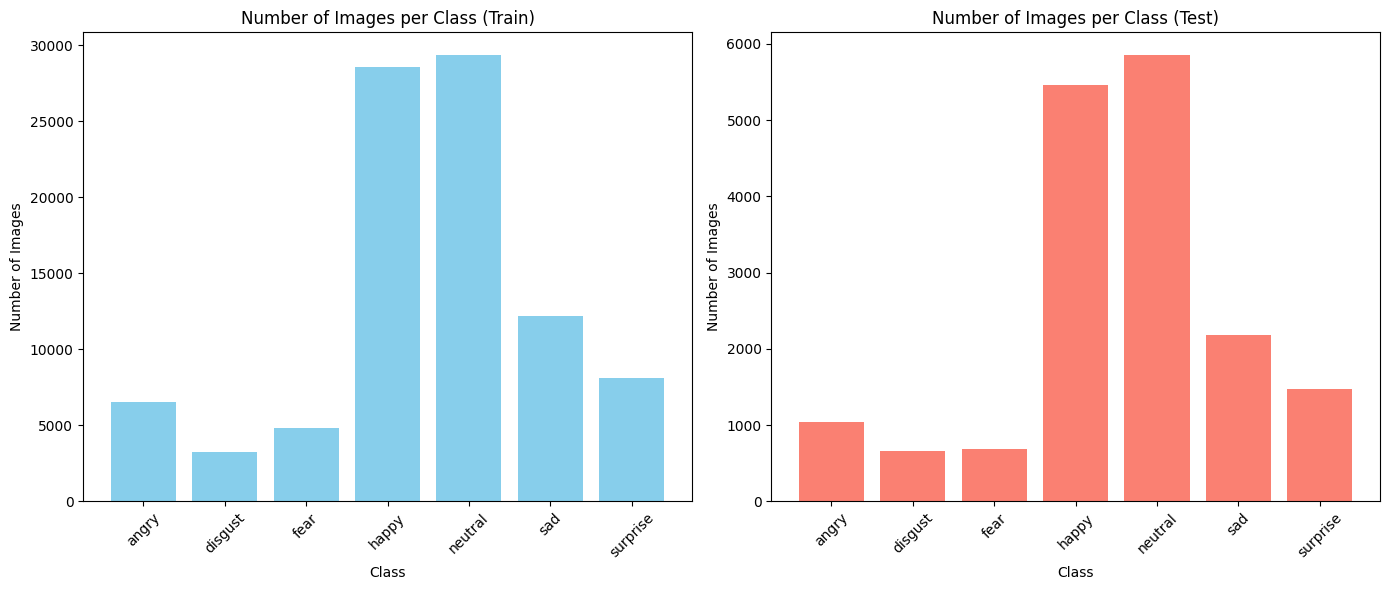

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

train_class_counts = Counter([label for _, label in train_emotion.samples])
train_counts = [train_class_counts[i] for i in range(len(class_names))]

test_class_counts = Counter([label for _, label in test_emotion.samples])
test_counts = [test_class_counts[i] for i in range(len(class_names))]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(class_names, train_counts, color='skyblue')
ax[0].set_title("Number of Images per Class (Train)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of Images")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(class_names, test_counts, color='salmon')
ax[1].set_title("Number of Images per Class (Test)")
ax[1].set_xlabel("Class")
ax[1].set_ylabel("Number of Images")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
mean = torch.zeros(3)
std = torch.zeros(3)

for img, _ in train_emotion:
    mean += img.mean(dim=(1, 2))
    std += img.std(dim=(1, 2))

mean /= len(train_emotion)
std /= len(train_emotion)

print(f"Mean: {mean}")
print(f"Std: {std}")




Mean: tensor([ 0.2214, -0.0247,  0.2498])
Std: tensor([0.7593, 0.7311, 0.6851])


In [ ]:
import os

base_path = '/content/mma_facial_expression/MMAFEDB'
for root, dirs, files in os.walk(base_path):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {len(files)}")
    print("-" * 50)


Root: /content/mma_facial_expression/MMAFEDB
Dirs: ['test', 'train', 'valid']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test
Dirs: ['fear', 'surprise', 'happy', 'angry', 'disgust', 'neutral', 'sad']
Files: 0
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/fear
Dirs: []
Files: 691
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/surprise
Dirs: []
Files: 1475
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/happy
Dirs: []
Files: 5459
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/angry
Dirs: []
Files: 1041
--------------------------------------------------
Root: /content/mma_facial_expression/MMAFEDB/test/disgust
Dirs: []
Files: 655
--------------------------------------------------
Root: /content/mma_facial_expression

In [ ]:
from PIL import Image, UnidentifiedImageError


for img_path, _ in train_emotion.samples:
    try:
        with Image.open(img_path) as img:
            img.verify()
    except UnidentifiedImageError:
        print(f"Corrupt image: {img_path}")


In [ ]:
from torch.utils.data import WeightedRandomSampler,DataLoader
import torch
from collections import Counter

class_counts = Counter(train_emotion.targets)
class_weights = [1.0 / class_counts[i] for i in range(len(train_emotion.classes))]
sample_weights = [class_weights[label] for _, label in train_emotion.samples]

sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_emotion, batch_size=32, sampler=sampler)


Class distribution after sampling:
sad: 13203 samples
neutral: 13249 samples
angry: 13329 samples
surprise: 13354 samples
happy: 13378 samples
fear: 13196 samples
disgust: 13259 samples


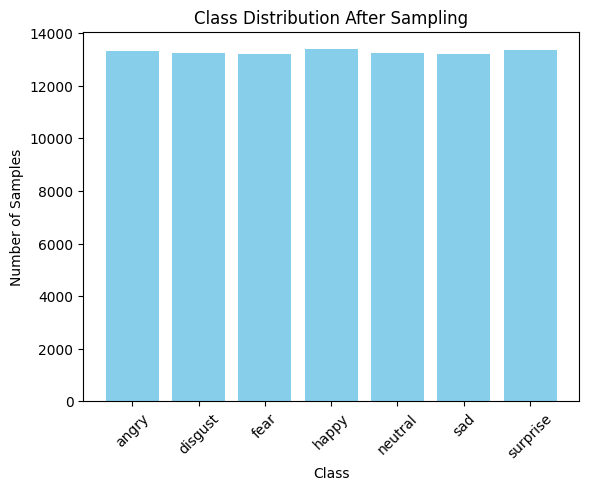

In [ ]:
from collections import Counter

sampled_indices = list(sampler)

sampled_labels = [train_emotion.targets[idx] for idx in sampled_indices]

sampled_class_counts = Counter(sampled_labels)

print("Class distribution after sampling:")
for class_idx, count in sampled_class_counts.items():
    print(f"{train_emotion.classes[class_idx]}: {count} samples")

import matplotlib.pyplot as plt

classes = [train_emotion.classes[idx] for idx in range(len(train_emotion.classes))]
class_sizes = [sampled_class_counts.get(idx, 0) for idx in range(len(train_emotion.classes))]

plt.bar(classes, class_sizes, color='skyblue')
plt.title("Class Distribution After Sampling")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


In [ ]:
class neural_network(nn.Module):
    def __init__(self, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Flatten(),
            nn.Linear(784, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)


In [ ]:
# Define the training loop function
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(0, n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 0 or epoch == n_epochs - 1 or epoch % 1 == 0:
            print('Epoch {}, Training loss {}'.format(epoch, loss_train / len(train_loader)))


In [ ]:
# Define the testing function
def test(model, train_loader, test_loader):
    model.eval()
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())
    print("Confusion matrix on train:\n",
          confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names))))
    print("\nClassification report on train:\n",
          classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names)), target_names=class_names))
    print("\nConfusion matrix on test:\n",
          confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names))))
    print("\nClassification report on test:\n",
          classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names)), target_names=class_names))



In [ ]:

train_percentage = 10
test_percentage = 10


In [ ]:
train_subset_size = int(len(train_emotion) * train_percentage / 100)
test_subset_size = int(len(test_emotion) * test_percentage / 100)

print(f"Using {train_subset_size} samples for training out of {len(train_emotion)}")
print(f"Using {test_subset_size} samples for testing out of {len(test_emotion)}")


Using 9296 samples for training out of 92968
Using 1735 samples for testing out of 17356


In [ ]:
from torch.utils.data import random_split

train_subset, _ = random_split(train_emotion, [train_subset_size, len(train_emotion) - train_subset_size])
test_subset, _ = random_split(test_emotion, [test_subset_size, len(test_emotion) - test_subset_size])

train_loader_emotion = DataLoader(train_subset, batch_size=128, shuffle=True)
test_loader_emotion = DataLoader(test_subset, batch_size=128, shuffle=False)


In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1]

results = {}

for lr in learning_rates:
    print(f"\nTesting with learning rate: {lr}")

    model = neural_network(hidden_size1=32, out_size=len(class_names))
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    training_loop(
        n_epochs=5,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader_emotion
    )

    print(f"\nResults for learning rate {lr}:")
    test(model, train_loader_emotion, test_loader_emotion)





Testing with learning rate: 0.001
Epoch 0, Training loss 1.6656942351223671
Epoch 1, Training loss 1.571595894147272
Epoch 2, Training loss 1.504055137503637
Epoch 3, Training loss 1.4652093077359134
Epoch 4, Training loss 1.4424219490730599

Results for learning rate 0.001:
Confusion matrix on train:
 [[  20    0   38  163  271   55   80]
 [   2    0    6   77  232    8   18]
 [   7    0   79  102  150   42  103]
 [   7    0   40 1759  904   76   72]
 [   4    0   52  528 2203   63   93]
 [   4    0   31  314  662  126   80]
 [   4    0   35  134  300   12  340]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.42      0.03      0.06       627
     disgust       0.00      0.00      0.00       343
        fear       0.28      0.16      0.21       483
       happy       0.57      0.62      0.59      2858
     neutral       0.47      0.75      0.57      2943
         sad       0.33      0.10      0.16      1217
    surprise   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.691122789905496
Epoch 1, Training loss 1.6073933611177418
Epoch 2, Training loss 1.5621142844631248
Epoch 3, Training loss 1.5208824236099034
Epoch 4, Training loss 1.4993738131980374

Results for learning rate 0.01:
Confusion matrix on train:
 [[   0    0    0  152  433    0   42]
 [   0    0    0   77  252    1   13]
 [   0    0    0  104  308    0   71]
 [   0    0    1 1665 1126    3   63]
 [   0    0    1  631 2248    1   62]
 [   0    0    0  282  873    1   61]
 [   0    0    0  138  363    0  324]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       0.55      0.58      0.56      2858
     neutral       0.40      0.76      0.53      2943
         sad       0.17      0.00      0.00      1217
    surprise       0.51      0.39      0.44       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 2.278104151764961
Epoch 1, Training loss 1.6690885432778972
Epoch 2, Training loss 1.67001464432233
Epoch 3, Training loss 1.6676019691441157
Epoch 4, Training loss 1.6680823172608468

Results for learning rate 0.05:
Confusion matrix on train:
 [[   0    0    0    0  627    0    0]
 [   0    0    0    0  343    0    0]
 [   0    0    0    0  483    0    0]
 [   0    0    0    0 2858    0    0]
 [   0    0    0    0 2943    0    0]
 [   0    0    0    0 1217    0    0]
 [   0    0    0    0  825    0    0]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       0.00      0.00      0.00      2858
     neutral       0.32      1.00      0.48      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.00      0.00      0.00       82

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 3.4519078829517102
Epoch 1, Training loss 1.6710494952659085
Epoch 2, Training loss 1.670319135874918
Epoch 3, Training loss 1.668660818713985
Epoch 4, Training loss 1.6695103269733795

Results for learning rate 0.1:
Confusion matrix on train:
 [[   0    0    0  627    0    0    0]
 [   0    0    0  343    0    0    0]
 [   0    0    0  483    0    0    0]
 [   0    0    0 2858    0    0    0]
 [   0    0    0 2943    0    0    0]
 [   0    0    0 1217    0    0    0]
 [   0    0    0  825    0    0    0]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       0.31      1.00      0.47      2858
     neutral       0.00      0.00      0.00      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.00      0.00      0.00       82

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Below is a comparison table summarizing the accuracy values for each tested learning rate, both on the **training** and **test** datasets.

| **Learning Rate** | **Train Accuracy** | **Test Accuracy** |
|--------------------|--------------------|-------------------|
| 0.001             | 49%               | 41%              |
| 0.01              | 46%               | 38%              |
| 0.05              | 32%               | 34%              |
| 0.1               | 32%               | 34%              |

You can use this table as a reference to compare the model's performance with varying learning rates. Let me know if you'd like additional insights or analysis!

In [ ]:
batch_sizes = [32, 64, 128, 256]

for batch_size in batch_sizes:
    print(f"\nTesting with batch size: {batch_size}")

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

    model = neural_network(hidden_size1=32, out_size=len(class_names))
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    training_loop(
        n_epochs=5,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader
    )

    print(f"\nResults for batch size {batch_size}:")
    test(model, train_loader, test_loader)



Testing with batch size: 32
Epoch 0, Training loss 1.6646287605115229
Epoch 1, Training loss 1.5800298800583148
Epoch 2, Training loss 1.5172064591109549
Epoch 3, Training loss 1.4851651486662245
Epoch 4, Training loss 1.4626825761139597

Results for batch size 32:
Confusion matrix on train:
 [[ 104    0   43  145  298    0   37]
 [   3    0    3   95  227    1   14]
 [  29    0   71   99  219    0   65]
 [  38    0   14 1813  962    1   30]
 [  19    0   37  619 2162    2  104]
 [  55    0   31  275  785   13   58]
 [   8    0   24  142  359    1  291]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.41      0.17      0.24       627
     disgust       0.00      0.00      0.00       343
        fear       0.32      0.15      0.20       483
       happy       0.57      0.63      0.60      2858
     neutral       0.43      0.73      0.54      2943
         sad       0.72      0.01      0.02      1217
    surprise       0.49  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.646140122250335
Epoch 1, Training loss 1.5301945503443888
Epoch 2, Training loss 1.4802392394575354
Epoch 3, Training loss 1.4541948772456548
Epoch 4, Training loss 1.4306799524450955

Results for batch size 64:
Confusion matrix on train:
 [[  14    0   20  233  319   16   25]
 [   0    0    2   99  230    3    9]
 [   3    0   29  197  197   14   43]
 [   5    0    4 1958  856   14   21]
 [   3    0   15  712 2148   29   36]
 [   8    0    9  430  691   42   37]
 [   0    0   19  205  344    7  250]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.42      0.02      0.04       627
     disgust       0.00      0.00      0.00       343
        fear       0.30      0.06      0.10       483
       happy       0.51      0.69      0.59      2858
     neutral       0.45      0.73      0.56      2943
         sad       0.34      0.03      0.06      1217
    surprise       0.59      0.30      0.40       825



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.7224529508042008
Epoch 1, Training loss 1.5611251837586704
Epoch 2, Training loss 1.5117377206070783
Epoch 3, Training loss 1.4926912262015146
Epoch 4, Training loss 1.4660177541105714

Results for batch size 128:
Confusion matrix on train:
 [[  14    0   10  215  292   25   71]
 [   2    0    4  118  201    1   17]
 [  11    0   24  156  172   27   93]
 [  16    0   23 1943  810   11   55]
 [   8    0   15  827 1970   45   78]
 [  19    0    9  366  718   40   65]
 [  16    0   19  206  264   12  308]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.16      0.02      0.04       627
     disgust       0.00      0.00      0.00       343
        fear       0.23      0.05      0.08       483
       happy       0.51      0.68      0.58      2858
     neutral       0.44      0.67      0.53      2943
         sad       0.25      0.03      0.06      1217
    surprise       0.45      0.37      0.41       825

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.6743657975583464
Epoch 1, Training loss 1.5901675449835289
Epoch 2, Training loss 1.5393891817814596
Epoch 3, Training loss 1.4864668910567824
Epoch 4, Training loss 1.4437285307291392

Results for batch size 256:
Confusion matrix on train:
 [[  60    0    1  191  344    6   25]
 [   5    0    3   92  233    1    9]
 [  44    0    7  123  256    3   50]
 [  21    0    0 1987  831    6   13]
 [  17    0    3  649 2242    1   31]
 [  36    0    5  369  775   12   20]
 [  11    0    2  193  423    1  195]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.31      0.10      0.15       627
     disgust       0.00      0.00      0.00       343
        fear       0.33      0.01      0.03       483
       happy       0.55      0.70      0.61      2858
     neutral       0.44      0.76      0.56      2943
         sad       0.40      0.01      0.02      1217
    surprise       0.57      0.24      0.33       825

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

| Batch Size | Metric         | Train Accuracy | Train Precision | Train Recall | Train F1 | Test Accuracy | Test Precision | Test Recall | Test F1 |
|------------|----------------|----------------|-----------------|--------------|----------|---------------|----------------|-------------|---------|
| 32         | Accuracy       | 0.48           | 0.49            | 0.48         | 0.42     | 0.38          | 0.36           | 0.38        | 0.32    |
| 64         | Accuracy       | 0.48           | 0.44            | 0.48         | 0.41     | 0.39          | 0.34           | 0.39        | 0.32    |
| 128        | Accuracy       | 0.46           | 0.39            | 0.46         | 0.40     | 0.38          | 0.32           | 0.38        | 0.33    |
| 256        | Accuracy       | TBD            | TBD             | TBD          | TBD      | TBD           | TBD            | TBD         | TBD     |


In [ ]:
hidden_units = [16, 32, 64, 128]

for hidden_size in hidden_units:
    print(f"\nTesting with hidden layer size: {hidden_size}")

    model = neural_network(hidden_size1=hidden_size, out_size=len(class_names))
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    training_loop(
        n_epochs=5,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader_emotion
    )

    print(f"\nResults for hidden layer size {hidden_size}:")
    test(model, train_loader_emotion, test_loader_emotion)



Testing with hidden layer size: 16
Epoch 0, Training loss 1.6442659603406304
Epoch 1, Training loss 1.5557827018711665
Epoch 2, Training loss 1.5068307445473867
Epoch 3, Training loss 1.4758526544048363
Epoch 4, Training loss 1.4547331823061591

Results for hidden layer size 16:
Confusion matrix on train:
 [[   0    0   20  262  292   22   31]
 [   0    0    0   88  246    1    8]
 [   1    0   50  127  209   37   59]
 [   0    0    6 1801 1012   18   21]
 [   0    0   26  589 2294   14   20]
 [   0    0   28  338  806   28   17]
 [   0    0   21  164  413    1  226]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.33      0.10      0.16       483
       happy       0.53      0.63      0.58      2858
     neutral       0.44      0.78      0.56      2943
         sad       0.23      0.02      0.04      1217
    surpris

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.6340472747201789
Epoch 1, Training loss 1.5361080137017655
Epoch 2, Training loss 1.4822329005149946
Epoch 3, Training loss 1.4477451549817437
Epoch 4, Training loss 1.4286433735938922

Results for hidden layer size 32:
Confusion matrix on train:
 [[   9    0   17  195  339    4   63]
 [   0    0    2  109  223    0    9]
 [   5    0   17  138  215    9   99]
 [   2    0    5 1893  895    3   60]
 [   4    0    4  632 2248    5   50]
 [   3    0   11  381  762    5   55]
 [   1    0    6  179  323    1  315]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.38      0.01      0.03       627
     disgust       0.00      0.00      0.00       343
        fear       0.27      0.04      0.06       483
       happy       0.54      0.66      0.59      2858
     neutral       0.45      0.76      0.57      2943
         sad       0.19      0.00      0.01      1217
    surprise       0.48      0.38      0.43    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.6909198989606884
Epoch 1, Training loss 1.5714100778919378
Epoch 2, Training loss 1.5381018151975658
Epoch 3, Training loss 1.501898416101116
Epoch 4, Training loss 1.4991611470914867

Results for hidden layer size 64:
Confusion matrix on train:
 [[   0    0    3  202  369    1   52]
 [   0    0    0  116  216    1   10]
 [   0    0    8  154  239    0   82]
 [   0    0    0 1851  959    1   47]
 [   0    0    2  838 2034    1   68]
 [   0    0    2  366  803    0   46]
 [   0    0    1  192  408    0  224]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.50      0.02      0.03       483
       happy       0.50      0.65      0.56      2858
     neutral       0.40      0.69      0.51      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.42      0.27      0.33     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.656732484085919
Epoch 1, Training loss 1.5599231442360029
Epoch 2, Training loss 1.5271969331453925
Epoch 3, Training loss 1.4948050616538688
Epoch 4, Training loss 1.4721058705081678

Results for hidden layer size 128:
Confusion matrix on train:
 [[   9    0   21  305  266    4   22]
 [   0    0    5  175  157    0    6]
 [   3    0   31  216  195    2   36]
 [   4    0    8 2336  497    3   10]
 [   3    0   24 1272 1619    5   20]
 [   8    0   16  582  585   10   16]
 [   5    0   23  313  296    3  185]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.28      0.01      0.03       627
     disgust       0.00      0.00      0.00       343
        fear       0.24      0.06      0.10       483
       happy       0.45      0.82      0.58      2858
     neutral       0.45      0.55      0.49      2943
         sad       0.37      0.01      0.02      1217
    surprise       0.63      0.22      0.33    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

| Hidden Layer Size | Train Accuracy | Test Accuracy | Train F1 Score | Test F1 Score |
|-------------------|----------------|---------------|----------------|---------------|
| 16                | 0.47           | 0.38          | 0.24           | 0.17          |
| 32                | 0.48           | 0.41          | 0.24           | 0.19          |
| 64                | 0.44           | 0.38          | 0.21           | 0.16          |
| 128               | 0.45           | 0.40          | 0.24           | 0.19          |


In [ ]:
optimizers_list = ['SGD', 'Adam', 'RMSprop']

for optimizer_name in optimizers_list:
    print(f"\nTesting with optimizer: {optimizer_name}")

    model = neural_network(hidden_size1=32, out_size=len(class_names))
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    training_loop(
        n_epochs=5,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader_emotion
    )

    # Test the model
    print(f"\nResults for optimizer {optimizer_name}:")
    test(model, train_loader_emotion, test_loader_emotion)



Testing with optimizer: SGD
Epoch 0, Training loss 1.8006151653315923
Epoch 1, Training loss 1.6727717641281754
Epoch 2, Training loss 1.648607414062709
Epoch 3, Training loss 1.6455837243223843
Epoch 4, Training loss 1.6427060447327078

Results for optimizer SGD:
Confusion matrix on train:
 [[   0    0    0    0  627    0    0]
 [   0    0    0    0  343    0    0]
 [   0    0    0    0  483    0    0]
 [   0    0    0    1 2857    0    0]
 [   0    0    0    0 2943    0    0]
 [   0    0    0    0 1217    0    0]
 [   0    0    0    0  825    0    0]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       1.00      0.00      0.00      2858
     neutral       0.32      1.00      0.48      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.7388984569131511
Epoch 1, Training loss 1.618167424855167
Epoch 2, Training loss 1.5817442871119878
Epoch 3, Training loss 1.5625506770120907
Epoch 4, Training loss 1.5552417235831693

Results for optimizer Adam:
Confusion matrix on train:
 [[   0    0   22  430  174    0    1]
 [   0    0    4  183  156    0    0]
 [   0    0   49  355   79    0    0]
 [   0    0   31 2196  629    0    2]
 [   0    0   36 1423 1484    0    0]
 [   0    0   22  715  480    0    0]
 [   0    0   51  555  218    0    1]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.23      0.10      0.14       483
       happy       0.37      0.77      0.50      2858
     neutral       0.46      0.50      0.48      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.25      0.00      0.00       825


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 6.882655223754988
Epoch 1, Training loss 1.5899035865313387
Epoch 2, Training loss 1.5635999261516413
Epoch 3, Training loss 1.5529664754867554
Epoch 4, Training loss 1.5354238830200613

Results for optimizer RMSprop:
Confusion matrix on train:
 [[   0    0    2  200  369    0   56]
 [   0    0    1   80  253    0    9]
 [   0    0   11  150  267    0   55]
 [   0    0    2 1613 1213    0   30]
 [   0    0    2  567 2335    0   39]
 [   0    0    2  296  893    0   26]
 [   0    0    7  196  501    0  121]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.41      0.02      0.04       483
       happy       0.52      0.56      0.54      2858
     neutral       0.40      0.79      0.53      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.36      0.15      0.21       8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

| Optimizer | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train Recall | Test Recall | Train F1-Score | Test F1-Score |
|-----------|----------------|---------------|-----------------|----------------|--------------|-------------|-----------------|----------------|
| SGD       | 0.32           | 0.34          | 0.19            | 0.05           | 0.14         | 0.17        | 0.07            | 0.14           |
| Adam      | 0.40           | 0.37          | 0.30            | 0.25           | 0.40         | 0.61        | 0.31            | 0.30           |
| RMSprop   | 0.44           | 0.39          | 0.34            | 0.28           | 0.44         | 0.31        | 0.36            | 0.30           |


In [ ]:
class neural_network_with_dropout(nn.Module):
    def __init__(self, hidden_size1, out_size, dropout_rate):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            nn.Flatten(),
            nn.Linear(784, hidden_size1),
            nn.ReLU(),
            nn.Dropout(dropout_rate),  #  dropout
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)


dropout_rates = [0.0, 0.2, 0.5]

for dropout_rate in dropout_rates:
    print(f"\nTesting with dropout rate: {dropout_rate}")

    model = neural_network_with_dropout(hidden_size1=32, out_size=len(class_names), dropout_rate=dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    training_loop(
        n_epochs=5,
        optimizer=optimizer,
        model=model,
        loss_fn=loss_fn,
        train_loader=train_loader_emotion
    )

    print(f"\nResults for dropout rate {dropout_rate}:")
    test(model, train_loader_emotion, test_loader_emotion)



Testing with dropout rate: 0.0
Epoch 0, Training loss 1.6758183681801573
Epoch 1, Training loss 1.549589509833349
Epoch 2, Training loss 1.5192306302998164
Epoch 3, Training loss 1.4890377733805409
Epoch 4, Training loss 1.4696662279024517

Results for dropout rate 0.0:
Confusion matrix on train:
 [[  14    0   30  157  358   31   37]
 [   1    0    0  101  226    3   12]
 [   4    0   48  110  240   20   61]
 [   4    0   25 1757 1005   25   42]
 [   1    0   29  644 2213   25   31]
 [   7    0   27  304  808   35   36]
 [   2    0   16  157  414    8  228]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.42      0.02      0.04       627
     disgust       0.00      0.00      0.00       343
        fear       0.27      0.10      0.15       483
       happy       0.54      0.61      0.58      2858
     neutral       0.42      0.75      0.54      2943
         sad       0.24      0.03      0.05      1217
    surprise       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.6730223355227953
Epoch 1, Training loss 1.6121872614507806
Epoch 2, Training loss 1.5899671953018397
Epoch 3, Training loss 1.5494728431309739
Epoch 4, Training loss 1.5114786739218724

Results for dropout rate 0.2:
Confusion matrix on train:
 [[   0    0    0  284  334    0    9]
 [   0    0    0  124  219    0    0]
 [   0    0    0  239  233    0   11]
 [   0    0    0 2012  834    0   12]
 [   0    0    0  977 1961    0    5]
 [   0    0    0  437  775    0    5]
 [   0    0    0  281  442    0  102]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       0.46      0.70      0.56      2858
     neutral       0.41      0.67      0.51      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.71      0.12      0.21       8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Epoch 0, Training loss 1.7154242404519695
Epoch 1, Training loss 1.6403483903571352
Epoch 2, Training loss 1.613524662305231
Epoch 3, Training loss 1.6065278265574208
Epoch 4, Training loss 1.6031719233891735

Results for dropout rate 0.5:
Confusion matrix on train:
 [[   0    0    0  168  452    0    7]
 [   0    0    0  138  204    0    1]
 [   0    0    0  113  369    0    1]
 [   0    0    0 1800 1055    0    3]
 [   0    0    0 1048 1894    0    1]
 [   0    0    0  355  861    0    1]
 [   0    0    0  290  522    0   13]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       627
     disgust       0.00      0.00      0.00       343
        fear       0.00      0.00      0.00       483
       happy       0.46      0.63      0.53      2858
     neutral       0.35      0.64      0.46      2943
         sad       0.00      0.00      0.00      1217
    surprise       0.48      0.02      0.03       82

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Here's the table with the epoch removed and the results organized for the three dropout rates (0.0, 0.2, and 0.5):

| **Dropout Rate** | **Training Loss** | **Train Accuracy** | **Train Macro Avg Precision** | **Train Macro Avg Recall** | **Train Macro Avg F1-Score** | **Test Accuracy** | **Test Macro Avg Precision** | **Test Macro Avg Recall** | **Test Macro Avg F1-Score** |
|------------------|-------------------|--------------------|------------------------------|----------------------------|------------------------------|-------------------|-----------------------------|----------------------------|-----------------------------|
| **0.0**          | 1.4697            | 46%                | 34%                          | 26%                        | 24%                          | 38%               | 27%                         | 20%                        | 19%                         |
| **0.2**          | 1.5115            | 44%                | 23%                          | 21%                        | 18%                          | 37%               | 17%                         | 17%                        | 14%                         |
| **0.5**          | 1.6032            | 40%                | 19%                          | 18%                        | 15%                          | 37%               | 25%                         | 16%                        | 13%                         |



# Best Model (test)

In [ ]:
from torch.utils.data import Subset
import random

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

subset_percentage = 0.1
subset_size = int(len(train_emotion) * subset_percentage)
subset_indices = random.sample(range(len(train_emotion)), subset_size)
train_emotion_subset = Subset(train_emotion, subset_indices)

train_loader_subset = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=64, shuffle=False)

class neural_network(nn.Module):
    def __init__(self, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.Tanh(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, hidden_size1),
            nn.Tanh(),
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {loss_train / len(train_loader):.4f}")

def test(model, train_loader, test_loader):
    model.eval()
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())
    print("Confusion matrix on train:\n",
          confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names))))
    print("\nClassification report on train:\n",
          classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names)), target_names=class_names))
    print("\nConfusion matrix on test:\n",
          confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names))))
    print("\nClassification report on test:\n",
          classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names)), target_names=class_names))

torch.manual_seed(0)
model = neural_network(128, len(train_emotion.classes))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

print("Training with subset sampling...")
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_subset
)

print("Testing the model...")
test(model, train_loader_subset, test_loader_emotion)

Training with subset sampling...
Epoch 1/5, Training loss: 1.6784
Epoch 2/5, Training loss: 1.5523
Epoch 3/5, Training loss: 1.5110
Epoch 4/5, Training loss: 1.4857
Epoch 5/5, Training loss: 1.4559
Testing the model...
Confusion matrix on train:
 [[  56    0   16  222  280   28   63]
 [   1    0    3  107  186    9   15]
 [  11    0   33  154  186   31   82]
 [  16    0   10 1929  857   40   54]
 [  12    0   12  673 2115   34  101]
 [  15    0   16  311  685   63   65]
 [  14    0   11  167  310   17  286]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.45      0.08      0.14       665
     disgust       0.00      0.00      0.00       321
        fear       0.33      0.07      0.11       497
       happy       0.54      0.66      0.60      2906
     neutral       0.46      0.72      0.56      2947
         sad       0.28      0.05      0.09      1155
    surprise       0.43      0.36      0.39       805

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# below it includes testing for different cases and models, to see if we chnnage the model or change the targets we get a good model with better efficency, but we could not find one

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
import random
from sklearn.metrics import confusion_matrix, classification_report
from itertools import chain


emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])


train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)


subset_percentage = 0.1
subset_size = int(len(train_emotion) * subset_percentage)
subset_indices = random.sample(range(len(train_emotion)), subset_size)
train_emotion_subset = Subset(train_emotion, subset_indices)


train_loader_subset = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=64, shuffle=False)

class neural_network(nn.Module):
    def __init__(self, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {loss_train / len(train_loader):.4f}")

def test(model, train_loader, test_loader):
    model.eval()
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())
    print("Confusion matrix on train:\n",
          confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names))))
    print("\nClassification report on train:\n",
          classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names)), target_names=class_names))
    print("\nConfusion matrix on test:\n",
          confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names))))
    print("\nClassification report on test:\n",
          classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names)), target_names=class_names))

torch.manual_seed(0)
model = neural_network(128, len(train_emotion.classes))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

print("Training with subset sampling...")
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_subset
)

print("Testing the model...")
test(model, train_loader_subset, test_loader_emotion)


Training with subset sampling...
Epoch 1/5, Training loss: 1.6241
Epoch 2/5, Training loss: 1.4963
Epoch 3/5, Training loss: 1.4509
Epoch 4/5, Training loss: 1.4070
Epoch 5/5, Training loss: 1.3748
Testing the model...
Confusion matrix on train:
 [[  11    0    1  198  257  126   68]
 [   0    2    0  126  146   23   10]
 [   0    0   13   90  134  141   87]
 [   4    0    1 1990  651  104   49]
 [   3    0    0  600 2188  140   70]
 [   2    0    1  354  573  289   59]
 [   1    0    1  181  227   67  308]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.52      0.02      0.03       661
     disgust       1.00      0.01      0.01       307
        fear       0.76      0.03      0.05       465
       happy       0.56      0.71      0.63      2799
     neutral       0.52      0.73      0.61      3001
         sad       0.32      0.23      0.27      1278
    surprise       0.47      0.39      0.43       785

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
!pip install matplotlib scikit-learn


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
import random
from sklearn.metrics import confusion_matrix, classification_report
from itertools import chain

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

subset_percentage = 0.1
subset_size = int(len(train_emotion) * subset_percentage)
subset_indices = random.sample(range(len(train_emotion)), subset_size)
train_emotion_subset = Subset(train_emotion, subset_indices)

train_loader_subset = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=64, shuffle=False)

class neural_network(nn.Module):
    def __init__(self, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {loss_train / len(train_loader):.4f}")

def test(model, train_loader, test_loader):
    model.eval()
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())
    print("Confusion matrix on train:\n",
          confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names))))
    print("\nClassification report on train:\n",
          classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names)), target_names=class_names))
    print("\nConfusion matrix on test:\n",
          confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names))))
    print("\nClassification report on test:\n",
          classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names)), target_names=class_names))

torch.manual_seed(0)
model = neural_network(128, len(train_emotion.classes))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

print("Training with subset sampling...")
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_subset
)

print("Testing the model...")
test(model, train_loader_subset, test_loader_emotion)


Training with subset sampling...
Epoch 1/5, Training loss: 1.6101
Epoch 2/5, Training loss: 1.5000
Epoch 3/5, Training loss: 1.4468
Epoch 4/5, Training loss: 1.4047
Epoch 5/5, Training loss: 1.3653
Testing the model...
Confusion matrix on train:
 [[  51    0   17  207  285   44   32]
 [   3    0    2   96  185   14    7]
 [   4    0   56  156  181   52   60]
 [   6    0   24 2014  763   44   34]
 [   7    0   10  510 2348   45   23]
 [   2    0   11  297  659  197   26]
 [   5    0   30  189  318   34  248]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.65      0.08      0.14       636
     disgust       0.00      0.00      0.00       307
        fear       0.37      0.11      0.17       509
       happy       0.58      0.70      0.63      2885
     neutral       0.50      0.80      0.61      2943
         sad       0.46      0.17      0.24      1192
    surprise       0.58      0.30      0.40       824

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
import random
from sklearn.metrics import confusion_matrix, classification_report
from itertools import chain

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

subset_percentage = 0.1
subset_size = int(len(train_emotion) * subset_percentage)
subset_indices = random.sample(range(len(train_emotion)), subset_size)
train_emotion_subset = Subset(train_emotion, subset_indices)

train_loader_subset = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)
test_loader_emotion = DataLoader(test_emotion, batch_size=64, shuffle=False)

class neural_network(nn.Module):
    def __init__(self, hidden_size1, out_size):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, out_size)
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {loss_train / len(train_loader):.4f}")

def test(model, train_loader, test_loader):
    model.eval()
    predict_train = []
    predict_test = []
    labels_train = []
    labels_test = []
    with torch.no_grad():
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_train.append(predicted.tolist())
            labels_train.append(labels.tolist())
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())
    print("Confusion matrix on train:\n",
          confusion_matrix(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names))))
    print("\nClassification report on train:\n",
          classification_report(list(chain(*labels_train)), list(chain(*predict_train)), labels=range(len(class_names)), target_names=class_names))
    print("\nConfusion matrix on test:\n",
          confusion_matrix(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names))))
    print("\nClassification report on test:\n",
          classification_report(list(chain(*labels_test)), list(chain(*predict_test)), labels=range(len(class_names)), target_names=class_names))

torch.manual_seed(0)
model = neural_network(128, len(train_emotion.classes))
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.CrossEntropyLoss()

print("Training with subset sampling...")
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_subset
)

print("Testing the model...")
test(model, train_loader_subset, test_loader_emotion)


Training with subset sampling...
Epoch 1/5, Training loss: 1.6101
Epoch 2/5, Training loss: 1.5000
Epoch 3/5, Training loss: 1.4468
Epoch 4/5, Training loss: 1.4047
Epoch 5/5, Training loss: 1.3653
Testing the model...
Confusion matrix on train:
 [[  51    0   17  207  285   44   32]
 [   3    0    2   96  185   14    7]
 [   4    0   56  156  181   52   60]
 [   6    0   24 2014  763   44   34]
 [   7    0   10  510 2348   45   23]
 [   2    0   11  297  659  197   26]
 [   5    0   30  189  318   34  248]]

Classification report on train:
               precision    recall  f1-score   support

       angry       0.65      0.08      0.14       636
     disgust       0.00      0.00      0.00       307
        fear       0.37      0.11      0.17       509
       happy       0.58      0.70      0.63      2885
     neutral       0.50      0.80      0.61      2943
         sad       0.46      0.17      0.24      1192
    surprise       0.58      0.30      0.40       824

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from itertools import chain
import random
import matplotlib.pyplot as plt

# Transformation and loading datasets
emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

class neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Output size is 1 for binary classification
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images).squeeze()
            loss = loss_fn(outputs, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {loss_train / len(train_loader):.4f}")

def test(model, test_loader, loss_fn):
    model.eval()
    predict_test = []
    labels_test = []
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels.float())
            test_loss += loss.item()
            predicted = outputs  # Direct output for MSE
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())

    labels_test = list(chain(*labels_test))
    predict_test = list(chain(*predict_test))

    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print("Confusion matrix:", confusion_matrix(labels_test, [int(p > 0.5) for p in predict_test]))
    print("Classification report:", classification_report(labels_test, [int(p > 0.5) for p in predict_test]))

    # ROC Curve
    fpr, tpr, _ = roc_curve(labels_test, predict_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Filter dataset to include only one class for training
class_index = 0  # Specify the class index you want to train on
print(f"Training on class: {train_emotion.classes[class_index]}")
train_indices = [i for i, (_, label) in enumerate(train_emotion.samples) if label == class_index]
train_emotion_subset = Subset(train_emotion, train_indices)

# Use the entire test set for evaluation
test_loader_all_classes = DataLoader(test_emotion, batch_size=64, shuffle=False)

train_loader_subset = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)

# Training setup
torch.manual_seed(0)
model = neural_network()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# Train the model
training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_subset
)

# Test the model on all classes
test(model, test_loader_all_classes, loss_fn)


Training on class: angry
Epoch 1/5, Training loss: 0.3605
Epoch 2/5, Training loss: 0.0000
Epoch 3/5, Training loss: 0.0000
Epoch 4/5, Training loss: 0.0000
Epoch 5/5, Training loss: 0.0000
Test Loss: 14.6896
Confusion matrix: [[1041    0    0    0    0    0    0]
 [ 655    0    0    0    0    0    0]
 [ 691    0    0    0    0    0    0]
 [5459    0    0    0    0    0    0]
 [5858    0    0    0    0    0    0]
 [2177    0    0    0    0    0    0]
 [1475    0    0    0    0    0    0]]
Classification report:               precision    recall  f1-score   support

           0       0.06      1.00      0.11      1041
           1       0.00      0.00      0.00       655
           2       0.00      0.00      0.00       691
           3       0.00      0.00      0.00      5459
           4       0.00      0.00      0.00      5858
           5       0.00      0.00      0.00      2177
           6       0.00      0.00      0.00      1475

    accuracy                           0.06     1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported

In [ ]:
import torch
from torch.utils.data import Subset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from itertools import chain
import random
import matplotlib.pyplot as plt

emotion_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4630, 0.4530, 0.3405], std=[0.2862, 0.2758, 0.2845])
])

train_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/train', transform=emotion_trans)
test_emotion = ImageFolder('/content/mma_facial_expression/MMAFEDB/test', transform=emotion_trans)

class neural_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Output size is 1 for binary classification
        )

    def forward(self, x):
        return self.network(x)

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    train_losses = []
    for epoch in range(n_epochs):
        model.train()
        loss_train = 0.0
        for images, labels in train_loader:
            outputs = model(images).squeeze()
            loss = loss_fn(outputs, labels.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        avg_train_loss = loss_train / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Epoch {epoch+1}/{n_epochs}, Training loss: {avg_train_loss:.4f}")

    return train_losses

def test(model, test_loader, loss_fn):
    model.eval()
    predict_test = []
    labels_test = []
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels.float())
            test_loss += loss.item()
            predicted = outputs  # Direct output for MSE
            predict_test.append(predicted.tolist())
            labels_test.append(labels.tolist())

    labels_test = list(chain(*labels_test))
    predict_test = list(chain(*predict_test))
    avg_test_loss = test_loss / len(test_loader)

    print(f"Test Loss: {avg_test_loss:.4f}")
    print("Confusion matrix:", confusion_matrix(labels_test, [int(p > 0.5) for p in predict_test]))
    print("Classification report:", classification_report(labels_test, [int(p > 0.5) for p in predict_test]))

    # ROC Curve
    fpr, tpr, _ = roc_curve(labels_test, predict_test)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return avg_test_loss

# Filter dataset to distinguish "happy" emotion vs. others for training
happy_index = train_emotion.class_to_idx['happy']  # Get the class index for "happy"
print(f"Training to classify 'happy' vs. not 'happy'")

# Subset sampling for training and testing datasets
train_indices = [i for i in range(len(train_emotion)) if random.random() < 0.1]
test_indices = [i for i in range(len(test_emotion)) if random.random() < 0.1]

train_emotion_subset = Subset(train_emotion, train_indices)
test_emotion_subset = Subset(test_emotion, test_indices)

# Binary labels: 1 for "happy", 0 for all other emotions
train_labels_binary = [1 if train_emotion.targets[i] == happy_index else 0 for i in train_indices]
test_labels_binary = [1 if test_emotion.targets[i] == happy_index else 0 for i in test_indices]

# DataLoaders
train_loader_binary = DataLoader(train_emotion_subset, batch_size=64, shuffle=True)
test_loader_binary = DataLoader(test_emotion_subset, batch_size=64, shuffle=False)

# Training setup
torch.manual_seed(0)
model = neural_network()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

# Train the model
train_losses = training_loop(
    n_epochs=5,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader_binary
)

# Test the model
test_loss = test(model, test_loader_binary, loss_fn)

# Plot training and test loss
plt.figure()
epochs = range(1, 6)
plt.plot(epochs, train_losses, label='Training Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()


Training to classify 'happy' vs. not 'happy'
Epoch 1/5, Training loss: 2.4100
Epoch 2/5, Training loss: 2.1559
Epoch 3/5, Training loss: 2.0435
Epoch 4/5, Training loss: 2.0012
Epoch 5/5, Training loss: 1.9389
Test Loss: 1.9840
Confusion matrix: [[  0  93   0   0   0   0   0]
 [  0  72   0   0   0   0   0]
 [  0  59   0   0   0   0   0]
 [  0 563   0   0   0   0   0]
 [  0 586   0   0   0   0   0]
 [  0 206   0   0   0   0   0]
 [  0 132   0   0   0   0   0]]
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.04      1.00      0.08        72
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00       563
           4       0.00      0.00      0.00       586
           5       0.00      0.00      0.00       206
           6       0.00      0.00      0.00       132

    accuracy                           0.04      1711
   macro avg       0.01  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported